## My COVID 19 Projection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df=pd.read_csv("/Users/howardyan/Desktop/Data Accelerator/COVID 19 Project/covid_19_data.csv")

In [3]:
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df=df.loc[df['Country/Region']=='US']
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0


In [5]:
df=df[['ObservationDate','Deaths']]
df.head(5)

,ObservationDate,Deaths
31,01/22/2020,0.0
69,01/23/2020,0.0
117,01/24/2020,0.0
118,01/24/2020,0.0
158,01/25/2020,0.0


In [6]:
df=df[df['ObservationDate'].notnull()]

In [7]:
df['ObservationDate']=df[['ObservationDate']].apply(pd.to_datetime)

In [8]:
df=df.groupby('ObservationDate').sum()
df

,Deaths
ObservationDate,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-01-15,392499.0
2021-01-16,395851.0
2021-01-17,397600.0


In [9]:
from fbprophet import Prophet
model = Prophet()
train_df = df.rename(columns={"Deaths":'y'})
train_df["ds"] = train_df.index
model.fit(train_df);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


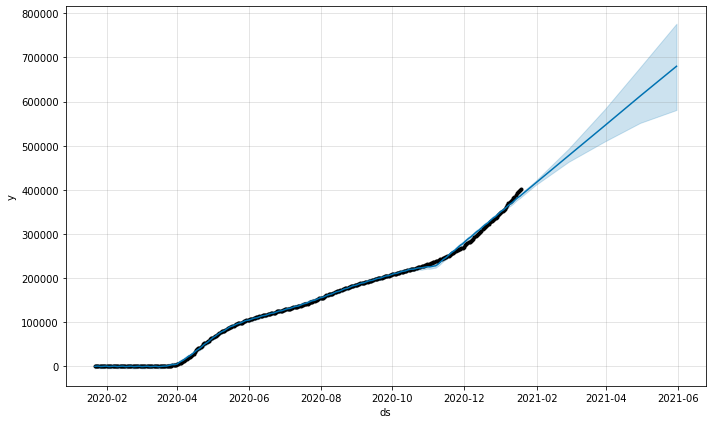

In [10]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 5 months
future = model.make_future_dataframe(5, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast);


In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-8.022260,-4677.216468,4039.980116,-8.022260,-8.022260,-118.570191,-118.570191,-118.570191,-118.570191,-118.570191,-118.570191,0.0,0.0,0.0,-126.592452
1,2020-01-23,-14.070313,-3934.709446,4314.493667,-14.070313,-14.070313,206.213984,206.213984,206.213984,206.213984,206.213984,206.213984,0.0,0.0,0.0,192.143672
2,2020-01-24,-20.118365,-3784.599478,4641.386025,-20.118365,-20.118365,386.735199,386.735199,386.735199,386.735199,386.735199,386.735199,0.0,0.0,0.0,366.616834
3,2020-01-25,-26.166417,-3869.773475,4466.177300,-26.166417,-26.166417,359.265770,359.265770,359.265770,359.265770,359.265770,359.265770,0.0,0.0,0.0,333.099352
4,2020-01-26,-32.214470,-4537.181709,4023.821673,-32.214470,-32.214470,-111.865653,-111.865653,-111.865653,-111.865653,-111.865653,-111.865653,0.0,0.0,0.0,-144.080122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2021-01-31,415326.827078,410739.782291,420149.716360,413849.539402,417272.256293,-111.865653,-111.865653,-111.865653,-111.865653,-111.865653,-111.865653,0.0,0.0,0.0,415214.961426
365,2021-02-28,477227.783222,463252.189490,492788.335238,463333.148420,492752.567401,-111.865653,-111.865653,-111.865653,-111.865653,-111.865653,-111.865653,0.0,0.0,0.0,477115.917569
366,2021-03-31,545760.984666,509792.043992,582845.311330,508326.869375,582104.122980,-118.570191,-118.570191,-118.570191,-118.570191,-118.570191,-118.570191,0.0,0.0,0.0,545642.414475
367,2021-04-30,612083.437677,551684.753726,677745.210766,549405.448613,676758.380684,386.735199,386.735199,386.735199,386.735199,386.735199,386.735199,0.0,0.0,0.0,612470.172876


In [12]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

forecast[['ds','trend']]

,ds,trend
0,2020-01-22,-8.022260
1,2020-01-23,-14.070313
2,2020-01-24,-20.118365
3,2020-01-25,-26.166417
4,2020-01-26,-32.214470
5,2020-01-27,-38.262522
6,2020-01-28,-44.310575
7,2020-01-29,-50.358627
8,2020-01-30,-56.406680
9,2020-01-31,-62.454732


In [13]:
def is_between_Jan_and_now(date):
    return date > datetime.datetime(2021, 1, 1) and date <= datetime.datetime(2021, 6, 30)

In [14]:
forecast = forecast[forecast.ds.apply(is_between_Jan_and_now)]

In [15]:
forecast[['ds','trend']]

,ds,trend
346,2021-01-02,351215.122501
347,2021-01-03,353425.870935
348,2021-01-04,355636.619368
349,2021-01-05,357847.367802
350,2021-01-06,360058.116236
351,2021-01-07,362268.864670
352,2021-01-08,364479.613103
353,2021-01-09,366690.361537
354,2021-01-10,368901.109971
355,2021-01-11,371111.858404
